In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
import tensorflow.keras as keras

In [12]:
keras.__version__

'2.6.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [13]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/Users/pushpakruhil/opt/anaconda3/lib/python3.8/site-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [15]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

Here the data has already been shaped unlike the mnist data we previously used.

each img is a 28x28 array

also, dtype is int, instead of float

In [20]:
x_train_full[1].shape

(28, 28)

splitting the cross validation set from the training set

In [45]:
# splitting the CV set from the training set

x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
# Normalising the data between 0 and 1
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:
import matplotlib.pyplot as plt


displaying the image

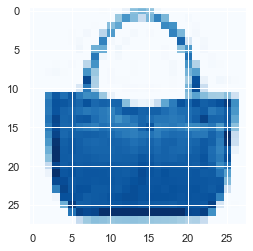

In [108]:
plt.imshow(x_train_full[100], cmap= 'Blues' ) 

In [49]:
class_names = [
    'T-SHIRT/TOP',
    'TROUSER',
    'PULLOVER',
    'DRESS',
    'COAT',
    'SANDAL',
    'SHIRT',
    'SNEAKER',
    'BAG',
    'ANKLE BOOT'
]

In [50]:
class_names[y_train[10]]

'T-SHIRT/TOP'

# NN Classification model - Sequential API

## Creating the model

------
equation - > 
$$H_{W,b}(X) = \phi(XW + b)$$

-----
https://datascience.stackexchange.com/questions/37357/why-is-the-softmax-function-often-used-as-activation-function-of-output-layer-in

In [52]:
model = keras.models.Sequential()
# Simplest keras model, Sequential model.
# Composed of a single stack of layers connected sequentially. [] ---> [] ---> [] ---> []


model.add(keras.layers.Flatten(input_shape=(28,28)))
# Flatten layer whose role is to convert each input image into 1D array. 
# Equivalent to using .reshape(-1,1)


model.add(keras.layers.Dense(300, activation='relu'))
# A dense hidden layer added with 300 neurons
# Each dense layer manages its own weight between the neurons and their inputs.\
# also manages a vector of bias vectors (1 per neuron)
# When input is provided, it computes the output as given in the equation above (in the heading)
# ReLu = rectified linear unit


model.add(keras.layers.Dense(100, activation='relu'))
# another dense later with 100 neurons

model.add(keras.layers.Dense(10, activation='softmax'))
# a dense layer with 10 neurons, which basically represents 1 for each class from class_names
# softmax is used as the activation here because the classes are exclusive.
# softmax is used because .... (check link)

In [65]:
# Another approach would be to pass a list of layers to sequential api while creating the model
# instead of writing each layere sepeately.

model = keras.models.Sequential([
    (keras.layers.Flatten(input_shape=(28,28))),
    (keras.layers.Dense(300, activation='relu')),
    (keras.layers.Dense(100, activation='relu')),
    (keras.layers.Dense(10, activation='softmax'))
])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [67]:
# keras.backend.clear_session()
# command to clear any created model

In [68]:
# PARAMETERS OF 2nd LAYER

(784*300) + 300 
# 784 from previous layer, 300 neurons, 300 bias terms

235500

In [69]:
model.layers

In [70]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [73]:
model.get_layer('dense') is hidden1

True

In [74]:
weights, biases = hidden1.get_weights()

In [82]:
weights
#random initialisation of weights to break the symmetry

array([[ 0.04152402, -0.00277881,  0.06183192, ...,  0.03675502,
         0.03472704, -0.00126877],
       [ 0.03728353, -0.00712388, -0.01525171, ..., -0.03072106,
         0.06411213, -0.07116213],
       [-0.00015687, -0.0649602 , -0.06914236, ..., -0.07139722,
         0.05623753, -0.05888776],
       ...,
       [-0.04850948,  0.03752149, -0.00818936, ..., -0.03363796,
         0.00987049, -0.00488213],
       [ 0.00718229,  0.07312204, -0.04285061, ..., -0.06778914,
        -0.04553389,  0.00957724],
       [-0.04682749,  0.03659555,  0.04777721, ...,  0.00554729,
        -0.03287754,  0.04472458]], dtype=float32)

In [85]:
weights.shape

(784, 300)

In [83]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [84]:
biases.shape

(300,)

## Compiling the model 

In [89]:
# Compiling the model
# We need to compile the model to specify the loss function and the optimiser to use

model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics='accuracy')

## fitting the data

In [90]:
history = model.fit(x_train, y_train, epochs=35, validation_data=(x_valid, y_valid))

Epoch 1/35
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7039 - accuracy: 0.7714 - val_loss: 0.5252 - val_accuracy: 0.8186
Epoch 2/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4846 - accuracy: 0.8309 - val_loss: 0.4466 - val_accuracy: 0.8508
Epoch 3/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4407 - accuracy: 0.8461 - val_loss: 0.4102 - val_accuracy: 0.8612
Epoch 4/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4145 - accuracy: 0.8540 - val_loss: 0.3931 - val_accuracy: 0.8650
Epoch 5/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3946 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8744
Epoch 6/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3786 - accuracy: 0.8664 - val_loss: 0.3630 - val_accuracy: 0.8746
Epoch 7/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3654 - accuracy: 0.8700 - val_loss: 0.3737 - val_accuracy:

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use( 'seaborn-white')

sns.set_theme(color_codes=True)

(0.0, 1.0)

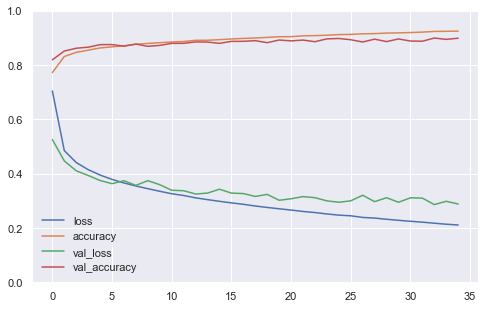

In [96]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)



## Evaluation and Predictions

In [111]:
(model.evaluate(x_test, y_test)[1] *100)

313/313 [==============================] - 1s 3ms/step - loss: 53.6467 - accuracy: 0.8693


86.93000078201294

In [112]:
x_new = x_test[:3]
y_proba = model.predict(x_new)

In [114]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

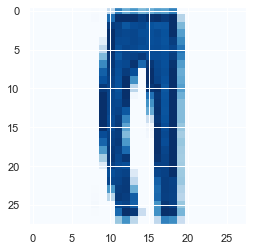

In [138]:
plt.imshow(x_new[2], cmap='Blues')


In [123]:
class_names[1]

'TROUSER'

In [131]:
y_pred = np.argmax(y_proba,axis=1)

In [133]:
y_pred

array([9, 2, 1])

# NN Regression model - Sequential API

In [140]:
# we will use the fetch_california_housing() function to load the data from sk-learn
# this contains only numerical attributes

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [141]:
housing = fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [142]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_valid = scaler.fit_transform(x_valid)

In [144]:
# only difference between classification and regression is that 
# the output layer contains a single neuron as we just want to make a single prediciton

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_valid, y_valid))



Epoch 1/25
363/363 [==============================] - 2s 2ms/step - loss: 0.9083 - val_loss: 3.2575
Epoch 2/25
363/363 [==============================] - 1s 2ms/step - loss: 3.8455 - val_loss: 0.4465
Epoch 3/25
363/363 [==============================] - 2s 4ms/step - loss: 0.4550 - val_loss: 0.4208
Epoch 4/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4137 - val_loss: 0.3997
Epoch 5/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3971 - val_loss: 0.3997
Epoch 6/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3935 - val_loss: 0.3977
Epoch 7/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3869 - val_loss: 0.3967
Epoch 8/25
363/363 [==============================] - 1s 1ms/step - loss: 0.3842 - val_loss: 0.3902
Epoch 9/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3801 - val_loss: 0.3963
Epoch 10/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3811 - val_loss: 0.3889

In [146]:
mse_test = model.evaluate(x_test, y_test)

x_new = x_test[:3]

y_predict = model.predict(x_new)

162/162 [==============================] - 0s 1ms/step - loss: 0.7414


In [147]:
y_predict

array([[4.3041162],
       [1.9296608],
       [1.1910689]], dtype=float32)

In [148]:
y_test[:3]

array([5.00001, 1.154  , 0.855  ])

In [149]:
mse_test

0.7414163947105408

In [153]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

<AxesSubplot:>

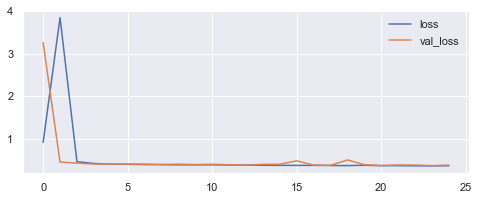

In [158]:
pd.DataFrame(history.history).plot(figsize=(8,3))

# Models using Functional API

functional API is used to create complex models. Coplex topologies, multiple inputs or outputs

## Single input

In [215]:
inp_layer = keras.layers.Input(shape = x_train.shape[1:])
hid1 = keras.layers.Dense(30, activation="relu")(inp_layer)
hid2 = keras.layers.Dense(30, activation = "relu")(hid1)
concat = keras.layers.Concatenate()([inp_layer, hid2])
output = keras.layers.Dense(1)(concat)

In [216]:
model = keras.Model(inputs=[inp_layer], outputs=[output])

In [217]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [229]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='mean_squared_error' )


In [231]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_valid, y_valid))

Epoch 1/25
363/363 [==============================] - 1s 3ms/step - loss: 0.4268 - val_loss: 0.4302
Epoch 2/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4260 - val_loss: 0.4265
Epoch 3/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4227 - val_loss: 0.4269
Epoch 4/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4214 - val_loss: 0.4276
Epoch 5/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4199 - val_loss: 0.4261
Epoch 6/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4218 - val_loss: 0.4206
Epoch 7/25
363/363 [==============================] - 1s 3ms/step - loss: 0.4172 - val_loss: 0.4230
Epoch 8/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4205
Epoch 9/25
363/363 [==============================] - 1s 3ms/step - loss: 0.4166 - val_loss: 0.4274
Epoch 10/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4223 - val_loss: 0.4206

In [232]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3787


0.37867456674575806

In [234]:
model.predict(x_new)

array([[3.1634185],
       [2.3261647],
       [0.8595564]], dtype=float32)

In [233]:
y_test[:3]

array([5.00001, 1.154  , 0.855  ])

In [230]:
#clear the session for any model
keras.backend.clear_session()


## Multiple inputs

In [236]:
input_a = keras.layers.Input(shape=[5], name="wide_input")
input_b = keras.layers.Input(shape=[6], name="deep_input")

hid1 = keras.layers.Dense(30, activation="relu")(input_b)
hid2 = keras.layers.Dense(30, activation="relu")(hid1)
concat = keras.layers.Concatenate()([input_a, hid2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_a, input_b], outputs=[output])


In [252]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [253]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           930         dense_1[0][0]                    
______________________________________________________________________________________________

In [254]:
x_train_a, x_train_b = x_train[:, :5], x_train[:, 2:]
x_valid_a, x_valid_b = x_valid[:, :5], x_valid[:, 2:]
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]
x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

'''
x_train_a, x_train_b = x_train[:,:5], x_train[:, 2:]
x_valid_a, x_valid_b = x_valid[:, :5], x_valid[:, 2:]
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]
x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

history = model.fit((x_train_a, x_train_b), y_train, epochs=20,
                    validation_data=((x_valid_a,x_valid_b), y_valid))
'''
history = model.fit((x_train_a, x_train_b), y_train, epochs=20,
                    validation_data=((x_valid_a, x_valid_b), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8299 - val_loss: 0.8869
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7191 - val_loss: 0.6551
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6464 - val_loss: 0.6121
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6107 - val_loss: 0.5859
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5621
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5623 - val_loss: 0.5437
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5449 - val_loss: 0.5336
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5303 - val_loss: 0.5180
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5180 - val_loss: 0.5077
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5092 - val_loss: 0.5017

In [299]:
model.evaluate((x_test_a, x_test_b), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4450


0.445022851228714

## Multiple inputs and multiple outputs

There may be a need for mltiple outputs

we may want to perform 2 ML operations together - regression and classification
            like locating and detecting the main object in the picture

we may want to perform multiple independent tasks simultaneously. We can train 2 NNs but
            this may yield a better result. eg: Multitask classification. detect facial
            expression and simultaneously if the person is wearing glasses or not

Another use case - as a regularization technique. 

In [346]:
input_a = keras.layers.Input(shape=[5])
input_b = keras.layers.Input(shape=[6])
hid1 = keras.layers.Dense(30, activation='relu')(input_b)
hid2 = keras.layers.Dense(30, activation='relu')(hid1)
concat = keras.layers.Concatenate()([input_a, hid2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hid2)




In [347]:
model = keras.Model(inputs=[input_a, input_b], outputs=[output, aux_output])

In [348]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 30)           210         input_16[0][0]                   
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           930         dense_22[0][0]                   
____________________________________________________________________________________________

In [349]:
loss_wts = {"main_output":0.9, "aux_output":0.1}
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss=['mse', 'mse'], loss_weights=loss_wts)

In [350]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 30)           210         input_16[0][0]                   
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           930         dense_22[0][0]                   
____________________________________________________________________________________________

In [351]:
history = model.fit([x_train_a, x_train_b], [y_train, y_train], 
                    epochs=20, validation_data=([x_valid_a, x_valid_b], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.6606 - main_output_loss: 2.4529 - aux_output_loss: 4.5293 - val_loss: 1.2712 - val_main_output_loss: 0.9961 - val_aux_output_loss: 3.7471
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0739 - main_output_loss: 0.8501 - aux_output_loss: 3.0885 - val_loss: 0.8953 - val_main_output_loss: 0.6982 - val_aux_output_loss: 2.6696
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8293 - main_output_loss: 0.6689 - aux_output_loss: 2.2730 - val_loss: 0.7812 - val_main_output_loss: 0.6383 - val_aux_output_loss: 2.0674
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7550 - main_output_loss: 0.6349 - aux_output_loss: 1.8355 - val_loss: 0.7283 - val_main_output_loss: 0.6155 - val_aux_output_loss: 1.7435
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7114 - main_output_loss: 0.6134 - aux_output_loss: 1.5936 - val_loss

In [352]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_a, x_test_b], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.5132 - main_output_loss: 0.4685 - aux_output_loss: 0.9157


In [353]:
total_loss

0.5131963491439819

In [354]:
y_pred_main, y_pred_aux = model.predict([x_new_a, x_new_b])

# Subclassing API to build dynamic models

This provides us with extra flexibilities, like using loops, if else statements
etc.

But this does come at a cost, we don't get to see how the layers are connected ewhen we call .summary()

moreover, we cannot save it.

Rest, we can just pass the inputs in the call() method of the class and then we can compile and 
call .fit() like before

In [332]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hid1 = keras.layers.Dense(units, activation=activation)
        self.hid2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_a, input_b = inputs
        hid1 = self.hid1(input_b)
        hid2 = self.hid2(hid1)
        concat = keras.layers.concatenate([hid2, input_a])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hid2)
        
        return main_output, aux_output



In [333]:
model = WideAndDeepModel()

In [339]:
model.compile(loss = ['mse', 'mse'], loss_weights=loss_wts, 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [343]:
model.call([input_a, input_b])

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_20')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_21')>)

In [344]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 36        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


# Saving and restoring models


In [345]:
# before we save, we need a sequential or functional API model
# Run that model and then come back here.

In [355]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 30)           210         input_16[0][0]                   
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           930         dense_22[0][0]                   
____________________________________________________________________________________________

In [358]:
# we can use .save() method to save the model with .h5 extension
# .h5 is the HDF5 format, to save 
# the model's architecture (including every layer's hyperparameters) and the values of 
# all the model''s parameters for every layer (connection weights, bias, etc)
# it also saves the optimizer with it's hyperparameters

#saving the multi output functional API model


In [359]:
model.save("keras_functional_model.h5")

In [360]:
ls

DL nb.ipynb                keras_functional_model.h5


In [363]:
# To restore the model

model_loaded = keras.models.load_model("keras_functional_model.h5")

In [364]:
model_loaded.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 30)           210         input_16[0][0]                   
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           930         dense_22[0][0]                   
____________________________________________________________________________________________

# Using Callbacks

callbacks are used to save the model at specific intervals, to save our progress.

to avoid losing the training till here

In [365]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_saved_model.h5")

In [366]:
history = model.fit([x_train_a, x_train_b] , [y_train, y_train], epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5314 - main_output_loss: 0.4866 - aux_output_loss: 0.9345
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5278 - main_output_loss: 0.4842 - aux_output_loss: 0.9204
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5255 - main_output_loss: 0.4832 - aux_output_loss: 0.9063
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5225 - main_output_loss: 0.4813 - aux_output_loss: 0.8933
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5195 - main_output_loss: 0.4792 - aux_output_loss: 0.8824
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5167 - main_output_loss: 0.4775 - aux_output_loss: 0.8701
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5139 - main_output_loss: 0.4754 - aux_output_loss: 0.8602
Epoch 8/10
363/363 [==============================] - 1s 2ms/s

Moreover, if we are using a validaition set during training, we can use set 

save_best_only=True

when creating  ModelCheckpoint.

This saves only when the performance is best on the cross_val set so far.
 
we need not worry about training for too long or overfitting.

We can simply restore the best model so far on the validaiton set.



In [367]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_saved_model.h5", save_best_only=True)

history = model.fit([x_train_a, x_train_b] , [y_train, y_train], epochs=10,
                   validation_data=([x_valid_a, x_valid_b], [y_valid, y_valid]), 
                   callbacks=[checkpoint_cb]) 
model = keras.models.load_model("callback_saved_model.h5") # Loading the best model

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5043 - main_output_loss: 0.4694 - aux_output_loss: 0.8183 - val_loss: 0.5020 - val_main_output_loss: 0.4645 - val_aux_output_loss: 0.8399
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5026 - main_output_loss: 0.4685 - aux_output_loss: 0.8093 - val_loss: 0.5028 - val_main_output_loss: 0.4661 - val_aux_output_loss: 0.8328
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4996 - main_output_loss: 0.4661 - aux_output_loss: 0.8006 - val_loss: 0.4970 - val_main_output_loss: 0.4611 - val_aux_output_loss: 0.8206
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4979 - main_output_loss: 0.4653 - aux_output_loss: 0.7915 - val_loss: 0.4989 - val_main_output_loss: 0.4638 - val_aux_output_loss: 0.8154
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4960 - main_output_loss: 0.4639 - aux_output_loss: 0.7845 - val_loss

We can also implement early stopping by setting an early stoppping callback.

It will interrupt training when it measures no progress on the validaiton set 

for a number of epochs(defined by the patience argument)

It will optionally roll back to the best model.

We can combine both callbacks to save checkpoints of our model and interrup training early when there is no more prograss.


In [368]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, 
                                                  restore_best_weights=True)

In [371]:
history = model.fit( [x_train_a, x_train_b] , [y_train, y_train], epochs=100,
                   validation_data=([x_valid_a, x_valid_b], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3967 - main_output_loss: 0.3799 - aux_output_loss: 0.5477 - val_loss: 0.4049 - val_main_output_loss: 0.3873 - val_aux_output_loss: 0.5625
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3957 - main_output_loss: 0.3789 - aux_output_loss: 0.5468 - val_loss: 0.4039 - val_main_output_loss: 0.3868 - val_aux_output_loss: 0.5586
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3958 - main_output_loss: 0.3791 - aux_output_loss: 0.5459 - val_loss: 0.4025 - val_main_output_loss: 0.3851 - val_aux_output_loss: 0.5586
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3958 - main_output_loss: 0.3793 - aux_output_loss: 0.5445 - val_loss: 0.4016 - val_main_output_loss: 0.3841 - val_aux_output_loss: 0.5587
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3907 - main_output_loss: 0.3736 - aux_output_loss: 0.5443 - val

Epoch 39/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3689 - main_output_loss: 0.3530 - aux_output_loss: 0.5121 - val_loss: 0.3848 - val_main_output_loss: 0.3688 - val_aux_output_loss: 0.5284
Epoch 40/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3692 - main_output_loss: 0.3534 - aux_output_loss: 0.5116 - val_loss: 0.3815 - val_main_output_loss: 0.3653 - val_aux_output_loss: 0.5271
Epoch 41/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3687 - main_output_loss: 0.3529 - aux_output_loss: 0.5110 - val_loss: 0.3845 - val_main_output_loss: 0.3687 - val_aux_output_loss: 0.5263
Epoch 42/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3687 - main_output_loss: 0.3529 - aux_output_loss: 0.5102 - val_loss: 0.3793 - val_main_output_loss: 0.3632 - val_aux_output_loss: 0.5240
Epoch 43/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3680 - main_output_loss: 0.3522 - aux_output_loss: 0.5096 

In [372]:
model.evaluate([x_test_a, x_test_b], [y_test, y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.3744 - main_output_loss: 0.3618 - aux_output_loss: 0.4880


[0.374385267496109, 0.36176449060440063, 0.48797163367271423]

We can also implement custom callbacks to get eextra control.


# TensorBoard

In [373]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [374]:
run_logdir = get_run_logdir()

In [376]:
run_logdir

'./my_logs/run_2021_12_20-00_01_20'

In [389]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([x_train_a, x_train_b] , [y_train, y_train], epochs=30,
                   validation_data=([x_valid_a, x_valid_b], [y_valid, y_valid]), 
                   callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3592 - main_output_loss: 0.3446 - aux_output_loss: 0.4912 - val_loss: 0.3694 - val_main_output_loss: 0.3544 - val_aux_output_loss: 0.5038
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3586 - main_output_loss: 0.3440 - aux_output_loss: 0.4904 - val_loss: 0.3699 - val_main_output_loss: 0.3551 - val_aux_output_loss: 0.5037
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3585 - main_output_loss: 0.3439 - aux_output_loss: 0.4898 - val_loss: 0.3737 - val_main_output_loss: 0.3591 - val_aux_output_loss: 0.5047
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3579 - main_output_loss: 0.3433 - aux_output_loss: 0.4892 - val_loss: 0.3717 - val_main_output_loss: 0.3571 - val_aux_output_loss: 0.5035
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3579 - main_output_loss: 0.3435 - aux_output_loss: 0.4878 - val_loss

In [386]:
cd /Users/pushpakruhil/DATA SCIENCE/HOML/DL/my_logs

/Users/pushpakruhil/DATA SCIENCE/HOML/DL


In [1]:
%load_ext tensorboard

ModuleNotFoundError: No module named 'tensorboard'

In [396]:
%tensorboard --logdir ="/Users/pushpakruhil/DATA SCIENCE/HOML/DL/my_logs/" --port=6016

In [397]:
import pandas as pd